## PADL Practical: Word2vec embeddings

In [79]:
# Demonstrating word2vec on toy data
import nltk

nltk.download("punkt")

[nltk_data] Downloading package punkt to /Users/ivanbar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Toy datasets
sentences0 = [
    "My husky bit me",
    "My husky pulls the sleigh",
    "My dog bit the postman",
    "I ate a pizza with olives",
    "I ate a sandwich with cheese",
    "You ate a hotdog with ketchup",
    "You ate a toast with cheese",
    "A husky is a type of dog",
    "What dog breed is your favourite? Mine is the husky.",
]

sentences1 = [
    "You know Dasher and Dancer and Prancer and Vixen Comet and Cupid and Donner and Blitzen, but do you recall the most famous reindeer of all?",
    "Rudolph the Red-Nosed Reindeer Had a very shiny nose And if you ever saw it, You would even say it glows.",
    "All of the other reindeer Used to laugh and call him names, They never let poor Rudolph Join in any reindeer games.",
    "Then one foggy Christmas Eve Santa came to say: Rudolph, with your nose so bright Will you not guide my sleigh tonight?",
    "Then how the reindeer loved him, As they shouted out with glee: Rudolph the Red-Nosed Reindeer, You will go down in history!",
]


sentences2 = [
    "The itsy bitsy spider went up the water spout.",
    "Down came the rain, and washed the spider out.",
    "Out came the sun, and dried up all the rain.",
    "So, the itsy bitsy spider went up the spout again.",
    "The itsy bitsy spider went up the water spout.",
    "Down came the rain, and washed the spider out.",
    "Out came the sun, and dried up all the rain.",
    "So, the itsy bitsy spider went up the spout again.",
]

sentences = sentences0  # + sentences1 + sentences2

# Tokenize sentences
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

# Number of dimensions for the Word2vec embeddings
v_size = 300

# Window size for the Word2vec training
w_size = 5

# Train Word2Vec model (check the Gensim library for more information)
# https://radimrehurek.com/gensim/auto_examples/index.html
model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=v_size,
    # window=w_size,
    min_count=1,
    workers=4,
    shrink_windows=True,
)

# Access embeddings: they are stored as KeyedVectors
word_embeddings = model.wv

**Produce the scatterplot of the first 2 components of the word2vec embeddings**

In [81]:
coordX = []
coordY = []
label = []
for key in word_embeddings.index_to_key:
    coordX.append(word_embeddings[key][0])
    coordY.append(word_embeddings[key][1])
    label.append(key)
    print(word_embeddings[key])

[-1.7968433e-04  8.0189704e-05  1.7006859e-03  3.0035041e-03
 -3.1002038e-03 -2.3724225e-03  2.1529375e-03  2.9923292e-03
 -1.6718130e-03 -1.2554460e-03  2.4623489e-03 -5.1326613e-04
 -1.5125618e-03  2.1847421e-03 -1.6209905e-03 -6.0653727e-04
  9.6081925e-04  3.2847046e-04 -2.7617763e-03 -3.1501187e-03
  2.4363918e-03  1.6915072e-03  2.2526220e-03  2.5400968e-04
  2.1173542e-03 -1.1346381e-03 -3.1669156e-04  1.9235947e-03
 -2.5077495e-03 -1.3118306e-03 -2.5043965e-03 -3.1078866e-04
  3.1777245e-03 -2.4422046e-03 -7.7830604e-04 -6.4546539e-04
  2.6918547e-03 -1.9781312e-03  1.6564185e-05 -1.5869348e-03
 -3.2025413e-03  1.6695175e-03 -2.9218383e-03 -1.4644889e-03
 -1.1032606e-05 -9.8564393e-05 -2.5565065e-03  3.2052873e-03
  1.6612962e-03  3.0781208e-03 -2.7214233e-03  1.4975485e-03
 -1.3778963e-03  2.7616057e-04  2.8337084e-03 -1.4872594e-03
  1.5056272e-03 -2.2626198e-03 -1.1836501e-03  3.1348001e-03
 -5.2625418e-04  1.0601652e-04 -1.3803075e-03 -2.5623913e-03
 -5.0345837e-04  8.23995

In [82]:
all_coords = np.array([word_embeddings[key] for key in word_embeddings.index_to_key])

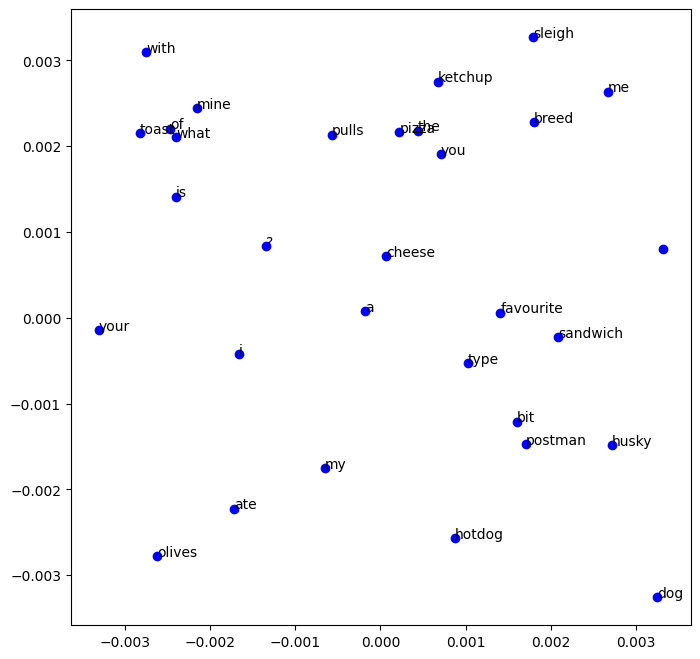

In [83]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(coordX, coordY, color="blue")

for i, txt in enumerate(label):
    ax.annotate(txt, (coordX[i], coordY[i]))

**Test if the Word2vec features are correlated or orthogonal to each other**

In [84]:
from scipy.stats import pearsonr

for i in range(4):
    for j in range(4):
        if i != j and i < j:
            print(
                f"Correlation between component {i} and component {j} is {pearsonr(all_coords[:, i], all_coords[:, j]).statistic}"
            )

            print(
                f"Dot product of component {i} and component {j} is {all_coords[:, i] @ all_coords[:, j]}"
            )

Correlation between component 0 and component 1 is -0.17373777670353416
Dot product of component 0 and component 1 is -2.0553055946948007e-05
Correlation between component 0 and component 2 is -0.051317589226316594
Dot product of component 0 and component 2 is -5.702272119378904e-06
Correlation between component 0 and component 3 is -0.0324573405085086
Dot product of component 0 and component 3 is -3.664589257823536e-06
Correlation between component 1 and component 2 is -0.005696765655372867
Dot product of component 1 and component 2 is -3.3655701372481417e-06
Correlation between component 1 and component 3 is -0.22096503604912934
Dot product of component 1 and component 3 is -3.437147461227141e-05
Correlation between component 2 and component 3 is 0.20326278428196212
Dot product of component 2 and component 3 is 2.584813228168059e-05


**Apply PCA to the word embeddings, and plot the PC1 vs PC2 scatterplot (with words as labels).**




In [85]:
# Separate the words (as 'labels') from the embeddings (stored in X)
label = []
X = []
for i, key in enumerate(word_embeddings.index_to_key):
    label.append(key)
    X.append(word_embeddings[key])

np.reshape(X, (-1, v_size))

array([[-1.7968433e-04,  8.0189704e-05,  1.7006859e-03, ...,
         1.6899899e-04,  2.7378341e-03, -2.3408541e-03],
       [-2.7479352e-03,  3.1005281e-03, -6.5184606e-05, ...,
        -2.8971382e-03,  9.8764000e-04, -2.2261012e-03],
       [ 2.7107573e-03, -1.4857781e-03, -3.5611907e-04, ...,
         2.3727485e-03,  1.9638126e-03, -1.8602058e-03],
       ...,
       [ 1.4060811e-03,  6.1568622e-05,  1.5957352e-03, ...,
        -1.7135496e-03, -6.1791571e-04, -1.7098649e-03],
       [-1.3459345e-03,  8.3841669e-04,  5.2952446e-04, ...,
         1.5151899e-03, -1.7408036e-04,  4.8586342e-04],
       [ 2.0884047e-03, -2.2241194e-04, -1.4048219e-03, ...,
        -4.3879723e-04,  2.2438788e-03,  3.7367642e-04]], dtype=float32)

In [86]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

X_scaled = scale(X)
pca = PCA()
X_transformed = pca.fit_transform(X_scaled)
X_transformed

array([[ 2.26429950e+00, -3.60259454e+00,  4.45072922e+00,
         5.08389780e+00,  2.78732295e+00,  2.20693867e+00,
        -2.32089769e+00, -4.19636307e+00, -1.62333372e+00,
        -3.66954387e+00,  5.68534471e-01,  5.33185060e-01,
         3.77518358e+00, -8.14354779e-01,  6.15219430e+00,
         1.43363425e-01, -1.10936027e+00,  1.28619991e+00,
         1.22108977e+00,  7.19556789e+00, -1.17094623e+00,
        -3.40212813e+00, -2.76503846e+00, -1.47858267e+00,
        -3.01144835e+00,  1.37094018e+00,  4.32059693e+00,
        -8.98439854e-01,  6.22178405e-01, -2.55796682e+00,
         1.79401746e-15],
       [-2.40954961e+00,  5.64458131e+00,  3.60938430e+00,
        -4.16063759e+00, -4.89295790e+00,  8.64111825e+00,
        -1.84925904e+00, -6.04692143e+00,  4.08590172e+00,
         1.77282326e+00, -4.90274084e-02, -1.83763580e+00,
         2.23571473e+00,  2.85826064e-01, -1.71072716e+00,
        -2.80141377e-01, -3.47994648e+00,  6.21606952e-01,
         1.74103763e+00, -2.64

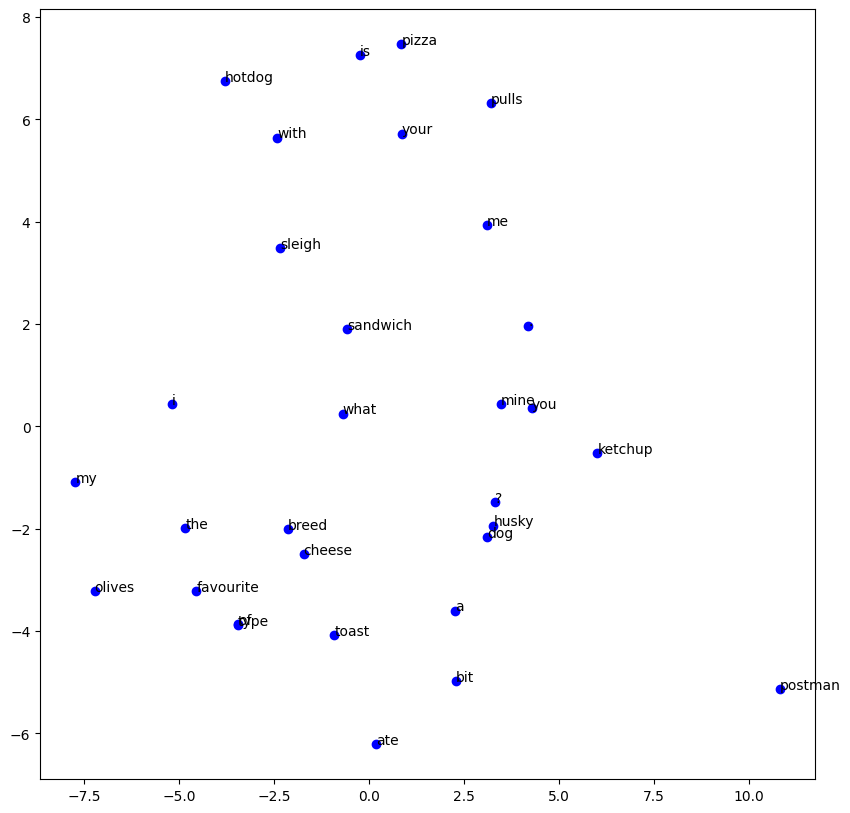

In [87]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], color="blue")

for i, txt in enumerate(label):
    ax.text(X_transformed[i, 0], X_transformed[i, 1], txt)

**Experiment** with (1) the choice of dataset (by adding and editing sentences), and with (2) different sizes for the word embedding vectors (vector_size) and (3) the window used to generate the embeddings, and study how they affect the PC scatterplot.



*   Can you find a setup that brings closer words that are close in meaning?
*   Can you find a setup that brings closer words with similar syntactic role, e.g. prepositions (on/at/under/near...)?

